In [32]:
import numpy as np
import pandas as pd
import os
from pprint import pprint
import sklearn.pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import expon, uniform
from scipy.sparse import spmatrix
import string
import matplotlib.pyplot as plt


In [33]:

def get_all_data_from_dir(dirname: str) -> tuple[list[str], list[str], list[str]]:
    x_train = load_data_from_file(os.path.join(dirname, "x_train.csv"), "text")
    y_train = load_data_from_file(os.path.join(dirname, "y_train.csv"), "is_positive_sentiment")
    x_test = load_data_from_file(os.path.join(dirname, "x_test.csv"), "text")
    return remove_punctuation(x_train), y_train, remove_punctuation(x_test)

def remove_punctuation(strings: list[str]) -> list[str]:
    s1 = [s.translate(str.maketrans('', '', string.punctuation)) for s in strings]
    s2 = [s.lower() for s in s1]
    return s2

def load_data_from_file(filename: str, col: str) -> list[str]:
    csv_data = pd.read_csv(filename)
    # pprint(csv_data)
    list_of_sentences = csv_data[col].values.tolist()
    return list_of_sentences


In [34]:
x, y, x_test = get_all_data_from_dir("data_reviews")


x = np.array(x)
y = np.array(y, dtype=np.int32)
x_test = np.array(x_test)

indices = np.arange(0, len(x), 1)
indices = np.random.shuffle(indices)

x = x[indices][0]
y = y[indices][0]


In [35]:
pipeline = sklearn.pipeline.Pipeline([
    ("bow_feature_extractor", CountVectorizer(ngram_range=(1,1), strip_accents="ascii")),
    ("classifier", LogisticRegression(max_iter=20000)),
])

distributions = {
    "classifier__C": np.logspace(-10, 10, 100), 
    # "classifier__tol": np.logspace(-10, 0, 50),
    # "bow_feature_extractor__min_df": np.linspace(0, 10, 5), 
    "bow_feature_extractor__max_df": np.linspace(0.01, 0.5, 100)
}

clf = GridSearchCV(pipeline, distributions, return_train_score=True, verbose=2, n_jobs=-1, cv=5, scoring=lambda e, x, y: roc_auc_score(y, e.predict(x)))

clf.fit(x, y)


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.592282793341094e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.592282793341094e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.592282793341094e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.592282793341094e-10; total time=   0.0s
[CV] END bow_feature_extractor__max_df=0.01, classifier__C=1.592282793341094e-10; total time=   0.0s
[CV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow_feature_extractor',
                                        CountVectorizer(strip_accents='ascii')),
                                       ('classifier',
                                        LogisticRegression(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'bow_feature_extractor__max_df': array([0.01      , 0.01494949, 0.01989899, 0.02484848, 0.02979798,
       0.03474747, 0.03969697, 0.04464646, 0.04959596, 0.05454545,
       0.05949495, 0.06444444, 0....
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10])},
             return_train_score=True,
             scoring=<function <lambda> at 0x17f450550>, verbose=2)

In [36]:
pd.DataFrame(clf.cv_results_)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.020502      0.001685         0.003297        0.000417   
1          0.019747      0.002517         0.002991        0.000218   
2          0.023222      0.003744         0.003249        0.000632   
3          0.022641      0.002451         0.003515        0.001250   
4          0.019086      0.001959         0.003226        0.000545   
...             ...           ...              ...             ...   
9995       0.037809      0.014447         0.003173        0.000285   
9996       0.036240      0.010190         0.003166        0.000244   
9997       0.031895      0.002758         0.003234        0.000196   
9998       0.037604      0.010142         0.003215        0.000193   
9999       0.045516      0.007942         0.005104        0.003788   

     param_bow_feature_extractor__max_df param_classifier__C  \
0                                   0.01                 0.0   
1                                   0.01                 0.0   
2                                   0.01                 0.0   
3                                   0.01                 0.0   
4                                   0.01                 0.0   
...                                  ...                 ...   
9995                                 0.5   1555676143.930466   
9996                                 0.5   2477076355.991714   
9997                                 0.5   3944206059.437648   
9998                                 0.5   6280291441.834272   
9999                                 0.5       10000000000.0   

                                                 params  split0_test_score  \
0     {'bow_feature_extractor__max_df': 0.01, 'class...           0.695833   
1     {'bow_feature_extractor__max_df': 0.01, 'class...           0.697917   
2     {'bow_feature_extractor__max_df': 0.01, 'class...           0.697917   
3     {'bow_feature_extractor__max_df': 0.01, 'class...           0.697917   
4     {'bow_feature_extractor__max_df': 0.01, 'class...           0.706250   
...                                                 ...                ...   
9995  {'bow_feature_extractor__max_df': 0.5, 'classi...           0.806250   
9996  {'bow_feature_extractor__max_df': 0.5, 'classi...           0.806250   
9997  {'bow_feature_extractor__max_df': 0.5, 'classi...           0.806250   
9998  {'bow_feature_extractor__max_df': 0.5, 'classi...           0.806250   
9999  {'bow_feature_extractor__max_df': 0.5, 'classi...           0.806250   

      split1_test_score  split2_test_score  ...  mean_test_score  \
0              0.685417           0.756250  ...         0.710833   
1              0.687500           0.752083  ...         0.710417   
2              0.687500           0.752083  ...         0.710417   
3              0.685417           0.754167  ...         0.710000   
4              0.683333           0.750000  ...         0.711250   
...                 ...                ...  ...              ...   
9995           0.812500           0.760417  ...         0.787083   
9996           0.812500           0.760417  ...         0.787083   
9997           0.812500           0.760417  ...         0.787083   
9998           0.812500           0.760417  ...         0.787083   
9999           0.812500           0.760417  ...         0.787083   

      std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0           0.024840             6884            0.882292            0.885938   
1           0.022860             6929            0.882812            0.882292   
2           0.022860             6929            0.884375            0.884896   
3           0.023695             6961            0.882813            0.885938   
4           0.022189             6860            0.884375            0.885417   
...              ...              ...                 ...                 ...   
9995        0.022415             1984            1.000000            1.0000

In [41]:
yhat = clf.predict_proba(x)[:,1]
clf.best_params_
# roc_auc_score(y, yhat)
# yhat_test = clf.predict_proba(x_test)[:,1]
# with open("yproba1_test.txt", "w") as f:
#     f.writelines([f"{str(v)}\n" for v in yhat_test])


{'bow_feature_extractor__max_df': 0.19808080808080808,
 'classifier__C': 1.2618568830660184}

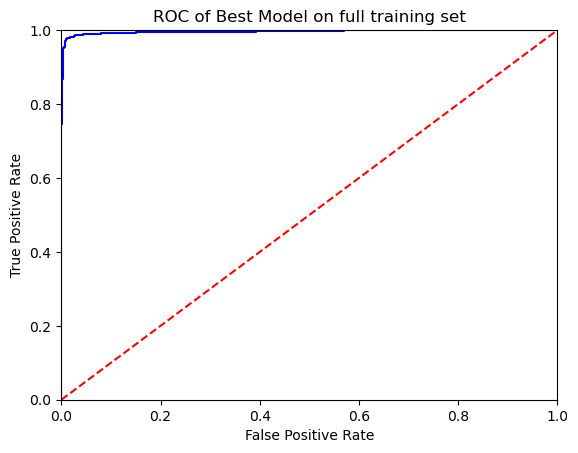

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y, yhat)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC of Best Model on full training set')
plt.plot(fpr, tpr, 'b')
# plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [66]:
bow = CountVectorizer(ngram_range=(1,1), strip_accents="ascii", max_df=clf.best_params_["bow_feature_extractor__max_df"])
print(clf.best_params_["bow_feature_extractor__max_df"])
bow.fit_transform(x)
len(bow.vocabulary_)


0.19808080808080808


4677

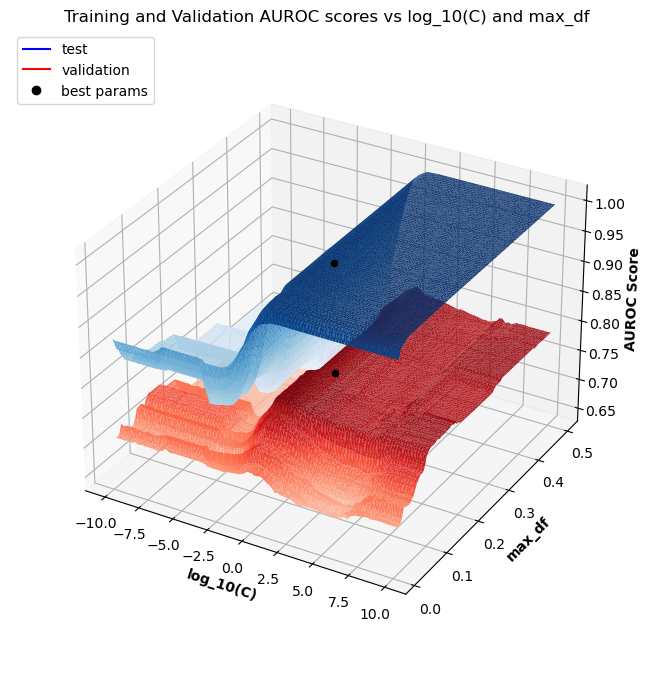

In [67]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(121, projection='3d', computed_zorder=False) 

# X is C values
# Y is max_df values
# Z is scores: either mean_test_score or mean_train_score
x_axis = np.log10(np.asarray(clf.cv_results_["param_classifier__C"], dtype=np.float64))
y_axis = np.asarray(clf.cv_results_["param_bow_feature_extractor__max_df"], dtype=np.float64)

z_axis_1 = np.asarray(clf.cv_results_["mean_test_score"], dtype=np.float64)
z_axis_2 = np.asarray(clf.cv_results_["mean_train_score"], dtype=np.float64)

ax.plot_trisurf(x_axis, y_axis, z_axis_1, cmap=plt.cm.Reds, zorder=0)
ax.plot_trisurf(x_axis, y_axis, z_axis_2, cmap=plt.cm.Blues, zorder=10)
ax.set_title("Training and Validation AUROC scores vs log_10(C) and max_df")

best_train_score = clf.cv_results_["mean_train_score"][clf.best_index_]
best_test_score = clf.cv_results_["mean_test_score"][clf.best_index_]
best_C = clf.cv_results_["param_classifier__C"][clf.best_index_]
best_max_df = clf.cv_results_["param_bow_feature_extractor__max_df"][clf.best_index_]

ax.scatter([best_C, best_C], [best_max_df, best_max_df], [best_test_score, best_train_score], color="black", alpha=1.0, depthshade=False, zorder=20)

ax.plot([], [], [], "-", label="test", color="blue")
ax.plot([], [], [], "-", label="validation", color="red")
ax.plot([], [], [], "o", label="best params", color="black")

ax.set_xlabel("log_10(C)", fontweight="bold")
ax.set_ylabel("max_df", fontweight="bold")
ax.set_zlabel("AUROC Score", fontweight="bold")
ax.set_box_aspect(aspect=None, zoom=0.9)
ax.legend(loc="upper left")
